#### Problem Statement

In this assignment students have to make ARIMA model over shampoo sales data and
check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds
=22r0&display=line
Hint:
Following is the command import packages and data
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
def parser(x):
return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,
squeeze=True, date_parser=parser)

### Import Required Modules 

In [82]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from bokeh.plotting import figure, show,output_notebook

In [73]:
def parser(x):
    #print(x)
    return datetime.strptime('190'+str(x), '%Y-%m')

In [74]:
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)

In [75]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [76]:
output_notebook(resources=None, verbose=False, hide_banner=False, load_timeout=5000, notebook_type='jupyter')
p = figure(x_axis_type="datetime", plot_width=900, plot_height=350,title="Shampoo Sales Dataset Plot",x_axis_label="Month",y_axis_label="Sales")
p.line(series.index,series, line_width=4)
show(p)

Loading BokehJS ...

### auto correlation plot

C:\Users\Ramaraju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


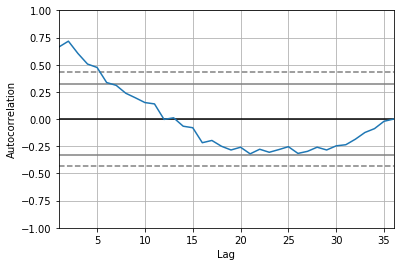

In [78]:
autocorrelation_plot(series)
pyplot.show()

there is a possitive correlation between 10 - 13 lags,so that i am using 5 as AR model parameter 

#### AR Model

In [79]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Ramaraju\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Ramaraju\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Fri, 13 Apr 2018   AIC                            406.340
Time:                        05:27:55   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

C:\Users\Ramaraju\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


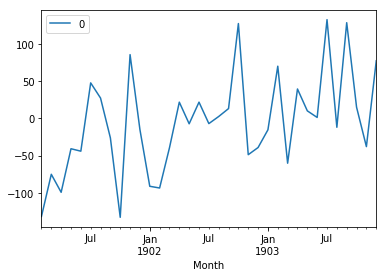

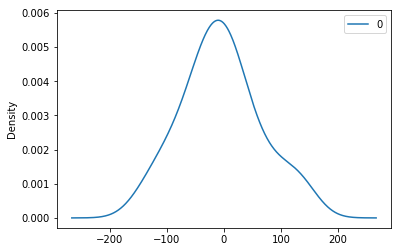

                0
count   35.000000
mean    -5.495268
std     68.132878
min   -133.296645
25%    -42.477958
50%     -7.186657
75%     24.748293
max    133.237920


In [83]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

#### Model Testing & mean squared error score (MSE)

In [91]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot


p = figure( plot_width=900, plot_height=350,title="Test VS Predictions",x_axis_label="Index",y_axis_label="Sales")
p.line([x for x in range(len(test))],test, line_width=4)
p.line([x for x in range(len(predictions))],predictions, line_width=4,line_color='red')
show(p)

C:\Users\Ramaraju\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Ramaraju\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Ramaraju\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=349.117664, expected=342.300000
predicted=306.512978, expected=339.700000
predicted=387.376483, expected=440.400000
predicted=348.154219, expected=315.900000
predicted=386.308851, expected=439.300000
predicted=356.082041, expected=401.300000
predicted=446.379504, expected=437.400000
predicted=394.737297, expected=575.500000
predicted=434.915548, expected=407.600000
predicted=507.923425, expected=682.000000
predicted=435.482824, expected=475.300000
predicted=652.743783, expected=581.300000
predicted=546.343425, expected=646.900000
Test MSE: 6958.326
